In [37]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm

from scipy import stats
from scipy.special import expit as logistic

In [2]:
d = pd.read_csv('Data/chimpanzees.csv', sep=';')
d.head()

,actor,recipient,condition,block,trial,prosoc_left,chose_prosoc,pulled_left
0,1,NaN,0,1,2,0,1,0
1,1,NaN,0,1,4,0,0,1
2,1,NaN,0,1,6,1,0,0
3,1,NaN,0,1,8,0,1,0
4,1,NaN,0,1,10,1,1,1


In [3]:
d.shape

(504, 8)

In [4]:
treatment = 1 + d.prosoc_left + 2 * d.condition
P = d.pulled_left
A = d.actor
B = d.block
T = treatment

In [5]:
actor_idx, actors = pd.factorize(d.actor)
treat_idx, treatments = pd.factorize(treatment)
block_idx, blocks = pd.factorize(d.block)

In [6]:
with pm.Model() as mBT:
    
    ## hyper-priors
    a_bar = pm.Normal('a_bar', 0, 1.5)
    sigma_A = pm.Exponential('sigma_A', 1)
    sigma_B = pm.Exponential('sigma_B', 1)
    
    ## adaptive priors
    b = pm.Normal('b', 0, sigma_B, shape = (len(treatments), len(blocks)))
    a = pm.Normal('a', a_bar, sigma_A, shape = len(actors))
    
    p = pm.math.invlogit(a[actor_idx] + b[treat_idx, block_idx])
    
    prosoc_l = pm.Bernoulli("P", p=p, observed=P)

    trace_mBT = pm.sample(2000)

az.summary(trace_mBT, round_to=2)

C:\Users\skorus01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  app.launch_new_instance()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, sigma_B, sigma_A, a_bar]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 41 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
C:\Users\skorus01\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_bar,0.61,0.71,-0.74,1.95,0.01,0.01,5671.90,4168.48,1.0
"b[0,0]",-0.24,0.36,-0.91,0.41,0.01,0.00,4803.74,5446.45,1.0
"b[0,1]",-0.02,0.34,-0.69,0.60,0.00,0.00,7938.32,5413.65,1.0
"b[0,2]",0.33,0.36,-0.29,1.06,0.01,0.01,2842.20,4018.32,1.0
"b[0,3]",0.09,0.34,-0.56,0.77,0.00,0.00,6804.32,4997.71,1.0
"b[0,4]",-0.36,0.38,-1.18,0.26,0.01,0.01,3054.75,4673.42,1.0
"b[0,5]",-0.24,0.36,-0.98,0.38,0.01,0.00,5008.81,4937.16,1.0
"b[1,0]",0.09,0.34,-0.54,0.75,0.00,0.00,7007.12,5199.13,1.0
"b[1,1]",-0.01,0.35,-0.69,0.64,0.00,0.00,9035.50,5386.02,1.0
"b[1,2]",-0.13,0.35,-0.77,0.56,0.00,0.00,8370.43,5612.01,1.0


C:\Users\skorus01\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C6B9E2C88>,
      dtype=object)

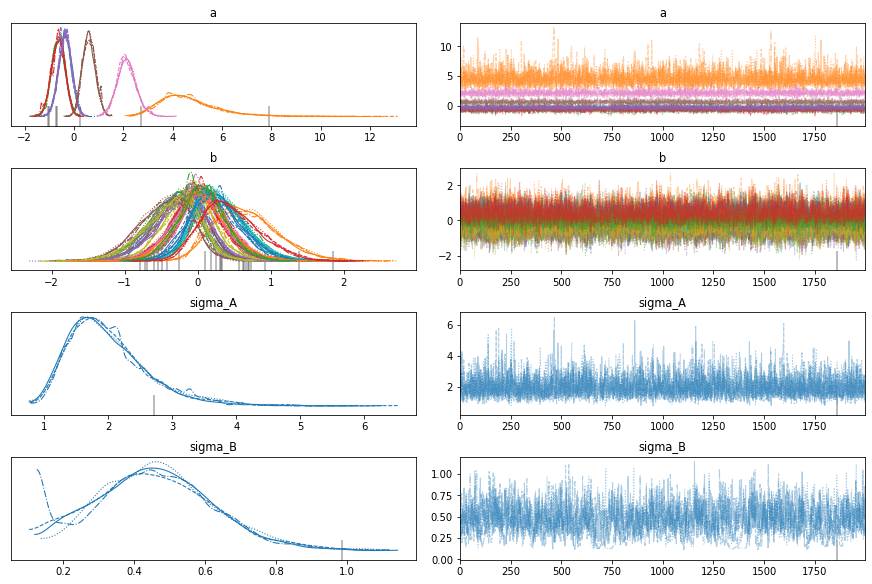

In [7]:
az.plot_trace(trace_mBT, var_names=['a', 'b', 'sigma_A', 'sigma_B'])

C:\Users\skorus01\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C6BBE0BC8>,
      dtype=object)

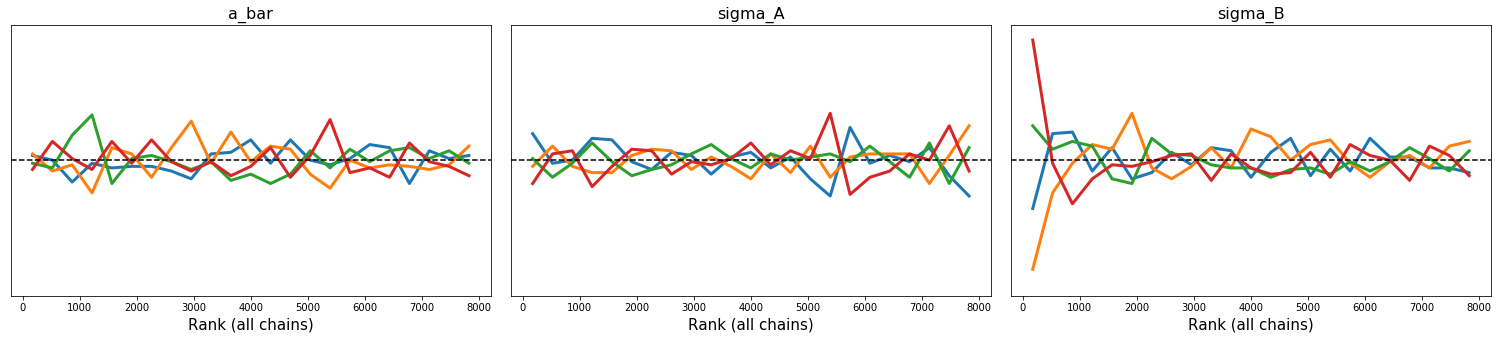

In [8]:
az.plot_rank(trace_mBT, var_names=['a_bar', 'sigma_A', 'sigma_B'], kind="vlines", vlines_kwargs={'lw':0}, marker_vlines_kwargs={'lw':3})

In [9]:
coords = {
    "actor_idx": actor_idx, 
    "treat_idx": treat_idx,
    "block_idx": block_idx,
    "treatments": treatments,
    "actors": actors,
    "blocks": blocks
}
with pm.Model(coords=coords) as mBTnc:
    
    actor_id = pm.Data("actor_idx", actor_idx, dims="actor_idx")
    treat_id = pm.Data("treat_idx", treat_idx, dims="treat_idx")
    block_id = pm.Data("block_idx", block_idx, dims="block_idx")
    
    
    ## adaptive priors
    z_b = pm.Normal('z_b', 0,1, dims = ("treatments", "blocks"))
    z_a = pm.Normal('z_a', 0,1, dims = "actors")
    ## hyper-priors
    a_bar = pm.Normal('a_bar', 0, 1.5)
    sigma_A = pm.Exponential('sigma_A', 1)
    sigma_B = pm.Exponential('sigma_B', 1)
    
    p = pm.Deterministic("p", pm.math.invlogit(a_bar + z_a[actor_id]*sigma_A + z_b[treat_id, block_id]*sigma_B))
    
    a = pm.Deterministic("a", a_bar + z_a[actor_idx]*sigma_A)
    b = pm.Deterministic("b", z_b[treat_idx, block_idx]*sigma_B)
                         
    prosoc_l = pm.Bernoulli("P", p=p, observed=P)

    trace_mBTnc = pm.sample(2000)

az.summary(trace_mBTnc, round_to=2, var_names=['a_bar', 'sigma_A', 'sigma_B'])

C:\Users\skorus01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_B, sigma_A, a_bar, z_a, z_b]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 71 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\skorus01\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_bar,0.62,0.71,-0.71,1.98,0.02,0.02,1070.59,1346.40,1.0
sigma_A,2.01,0.63,0.99,3.17,0.02,0.01,1648.68,1558.56,1.0
sigma_B,0.45,0.18,0.07,0.78,0.00,0.00,1788.67,1762.71,1.0


C:\Users\skorus01\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C6A6B9488>,
      dtype=object)

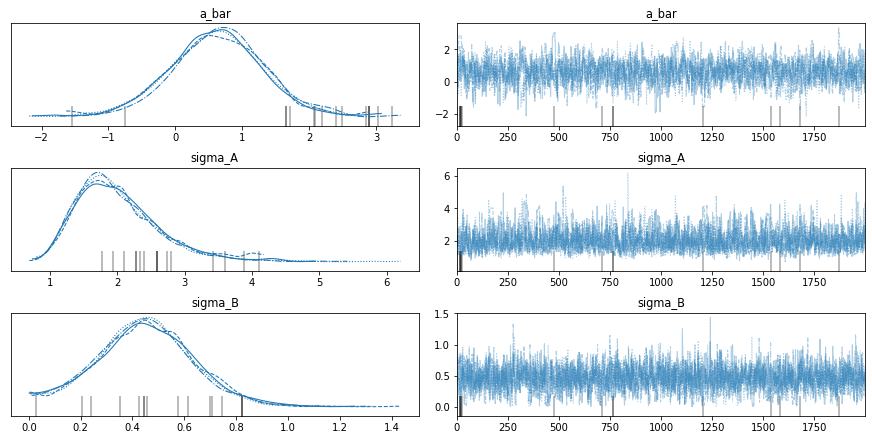

In [10]:
az.plot_trace(trace_mBTnc, var_names=['a_bar', 'sigma_A', 'sigma_B'])

C:\Users\skorus01\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C6E20A6C8>,
      dtype=object)

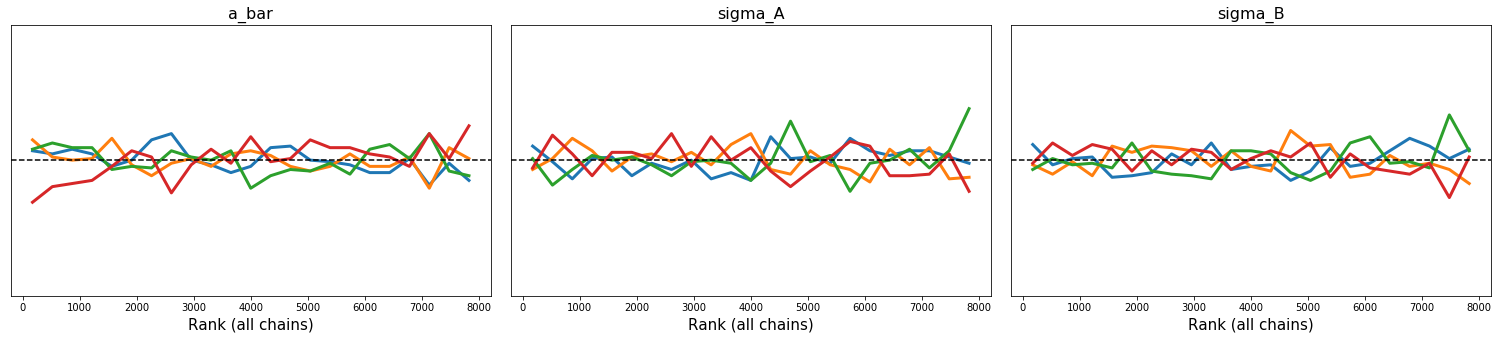

In [11]:
az.plot_rank(trace_mBTnc, var_names=['a_bar', 'sigma_A', 'sigma_B'], kind="vlines", vlines_kwargs={'lw':0}, marker_vlines_kwargs={'lw':3})

In [12]:
posterior_sample = az.from_pymc3(trace_mBTnc)
posterior_sample

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [26]:
actors = posterior_sample.posterior.groupby('actors').mean(dim={"treatments", "blocks", "chain"})

In [31]:
actors

<xarray.Dataset>
Dimensions:  (draw: 2000, actors: 7, p_dim_0: 504, a_dim_0: 504, b_dim_0: 504)
Coordinates:
  * draw     (draw) int32 0 1 2 3 4 5 6 7 ... 1993 1994 1995 1996 1997 1998 1999
  * actors   (actors) int64 1 2 3 4 5 6 7
  * p_dim_0  (p_dim_0) int32 0 1 2 3 4 5 6 7 ... 496 497 498 499 500 501 502 503
  * a_dim_0  (a_dim_0) int32 0 1 2 3 4 5 6 7 ... 496 497 498 499 500 501 502 503
  * b_dim_0  (b_dim_0) int32 0 1 2 3 4 5 6 7 ... 496 497 498 499 500 501 502 503
Data variables:
    z_b      (actors, draw) float64 0.08014 0.06848 ... -0.03218 -0.02659
    z_a      (actors, draw) float64 -0.6873 -0.7155 -0.6988 ... 0.8442 0.8955
    a_bar    (actors, draw) float64 0.86 0.9128 1.204 ... 0.1199 0.1553 0.7655
    sigma_A  (actors, draw) float64 1.937 1.857 2.319 ... 2.677 2.366 2.193
    sigma_B  (actors, draw) float64 0.4675 0.4638 0.4519 ... 0.3782 0.4513
    p        (actors, draw, p_dim_0) float64 0.2978 0.2978 ... 0.8864 0.8864
    a        (actors, draw, a_dim_0) float64 -0.5173 -0.5173 ... 2.581 2.581
    b        (actors, draw, b_dim_0) float64 -0.3557 -0.3557 ... -0.3331 -0.3331

In [32]:
actors_p = logistic(actors.a_bar + actors.z_a * actors.sigma_A + actors.z_b * actors.sigma_B)

In [47]:
actors_p.to_pandas()

0    1
1    2
2    3
3    4
4    5
5    6
6    7
Name: actors, dtype: int64

In [35]:
actors_p.actors

<xarray.DataArray 'actors' (actors: 7)>
array([1, 2, 3, 4, 5, 6, 7], dtype=int64)
Coordinates:
  * actors   (actors) int64 1 2 3 4 5 6 7

In [ ]:
posterior_sample.posterior.to